In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


In [3]:
# Load the training dataset
bike_data=pd.read_csv('daily-bike-share.csv')
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
# Add day feature
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [5]:
# Group all numeric and categorical features separately
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']


In [6]:
# Descriptive statistics
bike_data[numeric_features+['rentals']].describe()


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [7]:
# Separate features and labels
X,y=bike_data[['temp', 'atemp', 'hum', 'windspeed','season','mnth','holiday','weekday','workingday','weathersit', 'day']].values,bike_data['rentals'].values


In [8]:
# Split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("Training set:%d rows\nTest set: %d rows"%(X_train.shape[0],X_test.shape[0]))


Training set:511 rows
Test set: 220 rows


# Experimenting with algorithms
* Linear regression
        (i) Ordinary Least Squares
        (ii) Lasso
      (iii) Ridge
* Tree-based Algorithms
* Ensemble algorithms

# (i) Ordinary Least Squares


In [11]:
# Ordinary Least Squares Linear regression
from sklearn.linear_model import LinearRegression
model_ols=LinearRegression().fit(X_train,y_train)
print(model_ols)


LinearRegression()


In [12]:
# Evaluate OLS Linear regression model
predictions=model_ols.predict(X_test)
mse_ols=mean_squared_error(y_test,predictions)
print("MSE:",mse_ols)
rmse_ols=np.sqrt(mse_ols)
print("RMSE:",rmse_ols)
r2_ols=r2_score(y_test,predictions)
print("R2 score:",r2_ols)


MSE: 202873.555693691
RMSE: 450.4148706400478
R2 score: 0.6022791271458756


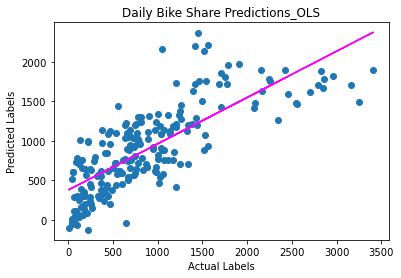

In [13]:
# Plot a visual of the predicted vs actual
plt.scatter(y_test,predictions)
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions_OLS')
plt.show()


# (ii) Lasso Linear regression


In [14]:
# Importing Lasso algorithm
from sklearn.linear_model import Lasso


In [15]:
# Fit a Lasso model
model_lasso=Lasso().fit(X_train,y_train)
print(model_lasso)


Lasso()


In [16]:
# Make predictions and evaluate model performance
predictions_lasso=model_lasso.predict(X_test)
mse_lasso=mean_squared_error(y_test,predictions_lasso)
print('MSE:',mse_lasso)
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE:',rmse_lasso)
r2_score_lasso=r2_score(y_test,predictions_lasso)
print('R2 score:',r2_score_lasso)


MSE: 202014.16439102474
RMSE: 449.45985848685615
R2 score: 0.6039639098562242


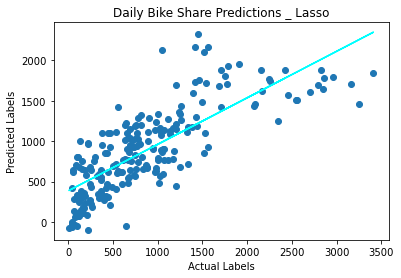

In [17]:
# Plot actual vs predicted
plt.scatter(y_test,predictions_lasso)
z=np.polyfit(y_test,predictions_lasso,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='cyan')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions _ Lasso')
plt.show()


# 2. Decision Tree Algorithm



In [18]:
# Import algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


In [19]:
# Train model
model_tree=DecisionTreeRegressor().fit(X_train,y_train)
print(model_tree)


DecisionTreeRegressor()


In [20]:
# Visualise the model tree
tree=export_text(model_tree)
print(tree)


|--- feature_0 <= 0.45
|   |--- feature_8 <= 0.50
|   |   |--- feature_1 <= 0.32
|   |   |   |--- feature_2 <= 0.41
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- feature_10 <= 25.50
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_10 >  25.50
|   |   |   |   |   |   |--- feature_2 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_2 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |--- feature_5 >  2.50
|   |   |   |   |   |--- feature_3 <= 0.28
|   |   |   |   |   |   |--- feature_10 <= 18.00
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_10 >  18.00
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_3 >  0.28
|   |   |   |   |   |   |--- feature_7 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_7 >  3.00
|   |   |   |   |   |   |   |--- value: [532.00]
|   |

In [21]:
# Evaluate the Tree model using the test data
predictions_tree=model_tree.predict(X_test)
mse_tree=mean_squared_error(y_test,predictions_tree)
print("MSE:",mse_tree)
rmse_tree=np.sqrt(mse_tree)
print("RMSE:",rmse_tree)
r2_tree=r2_score(y_test,predictions_tree)
print("MSE:",r2_tree)


MSE: 279027.82727272727
RMSE: 528.2308465744189
MSE: 0.4529834574346643


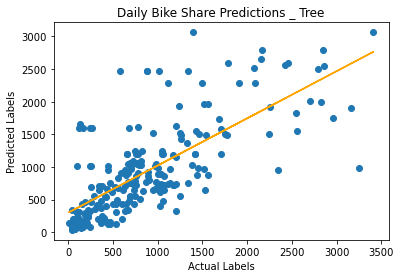

In [22]:
# Plot predicted vs actual
plt.scatter(y_test,predictions_tree)
z=np.polyfit(y_test,predictions_tree,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='orange')
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions _ Tree')
plt.show()


# (3) Ensemble Algorithms

## a) Random Forest Regression

In [23]:
# Import algorithm
from sklearn.ensemble import RandomForestRegressor


In [24]:
# Train model
model_rf=RandomForestRegressor().fit(X_train,y_train)
print(model_rf)


RandomForestRegressor()


In [25]:
# Evaluate model
predictions_rf=model_rf.predict(X_test)
mse_rf=mean_squared_error(y_test,predictions_rf)
print("MSE:",mse_rf)
rmse_rf=np.sqrt(mse_rf)
print("RMSE:",rmse_rf)
r2_rf=r2_score(y_test,predictions_rf)
print("MSE:",r2_rf)


MSE: 115199.09687863638
RMSE: 339.4099245435177
MSE: 0.7741594008843858


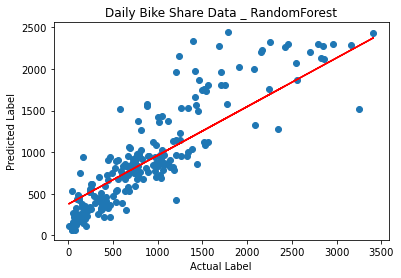

In [26]:
#Plot predicted vs actual
plt.scatter(y_test,predictions_rf)
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Daily Bike Share Data _ RandomForest')
plt.show()


# 3. b) Boosting Ensemble Algorithm


In [27]:
# Import algorithm
from sklearn.ensemble import GradientBoostingRegressor


In [28]:
# Fit the model
model_boost=GradientBoostingRegressor().fit(X_train,y_train)
print(model_boost)


GradientBoostingRegressor()


In [29]:
# Predict and evaluate model performance
predictions_boost=model_boost.predict(X_test)
mse_boost=mean_squared_error(y_test,predictions_boost)
print("MSE:",mse_boost)
rmse_boost=np.sqrt(mse_boost)
print("RMSE:",mse_boost)
r2_boost=r2_score(y_test,predictions_boost)
print("R2 score:",r2_boost)


MSE: 105960.19740093187
RMSE: 105960.19740093187
R2 score: 0.79227168344344


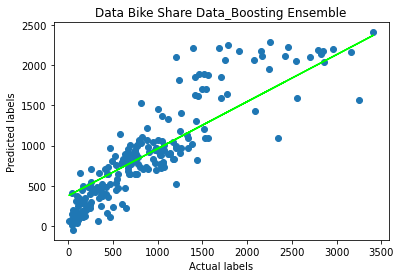

In [30]:

# Plot actual vs predicted
plt.scatter(y_test,predictions_boost)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Data Bike Share Data_Boosting Ensemble')
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='lime')
plt.show()

